In [4]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("../scripts")
from utilities.print_utilities import capitalized_spaced

In [5]:
# read the top 100 merchants to see trends
rank_df = pd.read_csv('../models/merchant_rankings.csv', index_col=0)
rank_df.head()

,merchant_abn,name,tags,tag,numd_sa2_code,returning_customers,unique_customers,median_weekly_income,commission_avg_tot_dollar_value_monthly,avg_num_order_id_monthly,...,minmax_returning_customers,minmax_unique_customers,minmax_median_weekly_income,minmax_commission_avg_tot_dollar_value_monthly,minmax_avg_num_order_id_monthly,minmax_avg_discounted_value,minmax_stddev_tot_dollar_value_monthly,minmax_avg_num_fraud_order_daily,minmax_stddev_tot_discounted_value_daily,average_rank
rank,,,,,,,,,,,,,,,,,,,,,
1,63290521567,Vehicula Pellentesque Corporation,"((artist supply and craft shops), (a), (take r...",artist supply and craft shops,2222.0,23346.0,24058.0,815.663697,13544.646461,8015.666667,...,0.029998,0.000955,0.949344,0.543891,0.414487,0.991384,0.454313,0.584846,0.341656,0.431087
2,45629217853,Lacus Consulting,"[[gift, Card, novelty, and souvenir shops], [a...","gift, card, novelty, and souvenir shops",2222.0,23944.0,24080.0,815.679442,27867.742923,10317.761905,...,0.005152,0.000042,0.949340,0.061567,0.246329,0.984823,0.878715,0.755418,0.655372,0.453676
3,49891706470,Non Vestibulum Industries,"((teNt and awning shops), (a), (take rate: 5.80))",tent and awning shops,2222.0,24037.0,24078.0,815.703894,19807.260486,11786.952381,...,0.001288,0.000125,0.949333,0.333000,0.139010,0.989872,0.736454,0.860525,0.531271,0.454088
4,91923722701,Euismod Urna Institute,"((tent and awning shops), (b), (take rate: 5.05))",tent and awning shops,2222.0,12869.0,22730.0,813.406766,2583.071986,3253.809524,...,0.465307,0.056105,0.949948,0.913016,0.762322,0.996772,0.110954,0.236622,0.087777,0.457882
5,57900494384,Porttitor Tellus Corporation,"[[tent and awning shops], [a], [take rate: 6.39]]",tent and awning shops,2222.0,12132.0,22468.0,817.218662,4220.197439,3081.000000,...,0.495928,0.066985,0.948928,0.857887,0.774945,0.993796,0.140886,0.224331,0.109741,0.461343


In [6]:
rank_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'numd_sa2_code',
       'returning_customers', 'unique_customers', 'median_weekly_income',
       'commission_avg_tot_dollar_value_monthly', 'avg_num_order_id_monthly',
       'avg_discounted_value', 'stddev_tot_dollar_value_monthly',
       'avg_num_fraud_order_daily', 'stddev_tot_discounted_value_daily',
       'minmax_numd_sa2_code', 'minmax_returning_customers',
       'minmax_unique_customers', 'minmax_median_weekly_income',
       'minmax_commission_avg_tot_dollar_value_monthly',
       'minmax_avg_num_order_id_monthly', 'minmax_avg_discounted_value',
       'minmax_stddev_tot_dollar_value_monthly',
       'minmax_avg_num_fraud_order_daily',
       'minmax_stddev_tot_discounted_value_daily', 'average_rank'],
      dtype='object')

In [10]:
def plot_metric_vs_rank(df: pd.DataFrame, metric: str, minmax: bool = False):
    
    colname = f"{'minmax_' if minmax else ''}{metric}"
    axisname = f"{capitalized_spaced(metric)}{' (min-max scaled)' if minmax else ''}"
    plt.figure()
    rev_v_month_plt = sns.scatterplot(
        x = 'rank', 
        y = colname,
        color='#234a55',
        data = df,
        markers=','
    )
    plt.xlabel('Rank')
    plt.ylabel(axisname)
    # plt.title(f'How {axisname} changes over our top 100 merchants')
    # plt.xticks(rotation=60, ha='right')
    plt.yticks(rotation=0)
    plt.legend().set_visible(False)
    rev_v_month_plt.figure.savefig(f'../plots/{colname}-vs-rank.png', 
            bbox_inches = 'tight', dpi = 500)

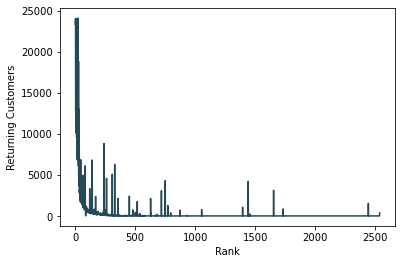

In [8]:
plot_metric_vs_rank(rank_df, 'returning_customers')

/var/folders/vm/4b2l4xh10_71ktbck3tm2plr0000gn/T/ipykernel_4843/3704189201.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


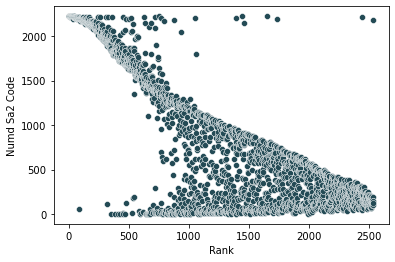

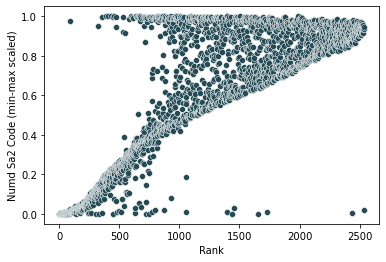

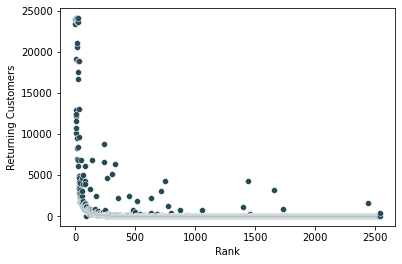

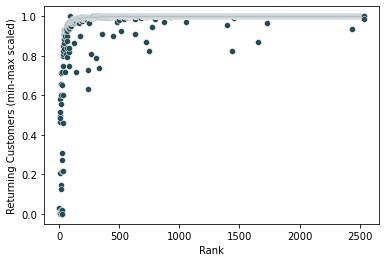

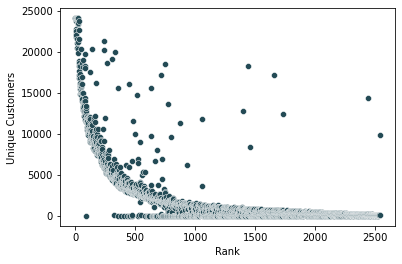

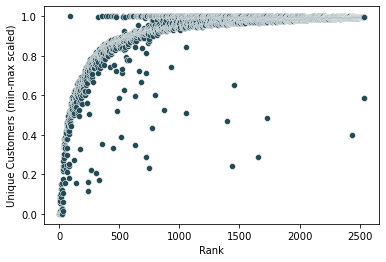

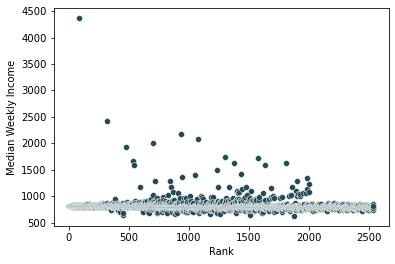

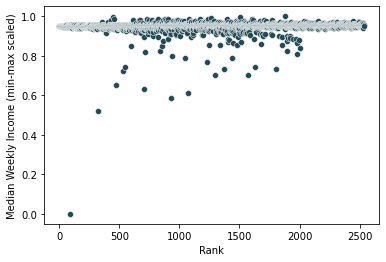

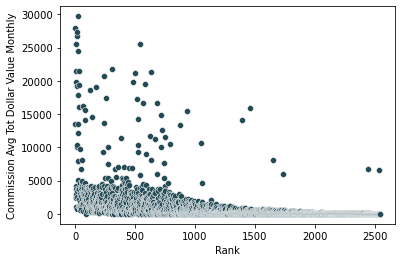

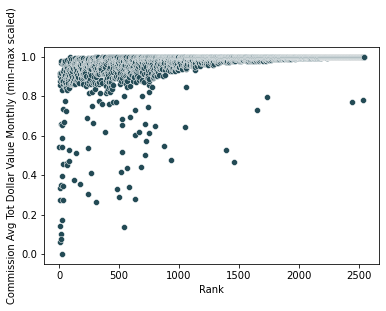

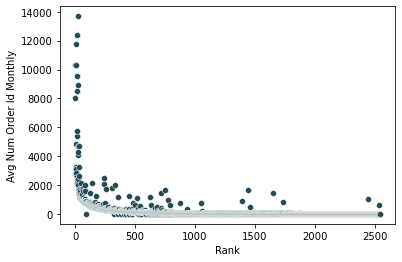

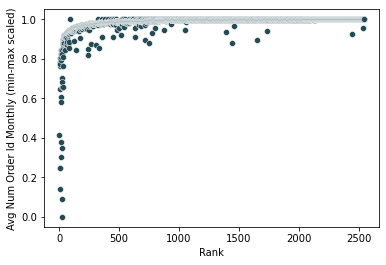

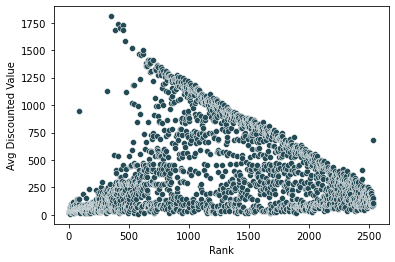

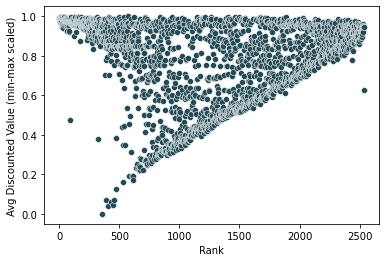

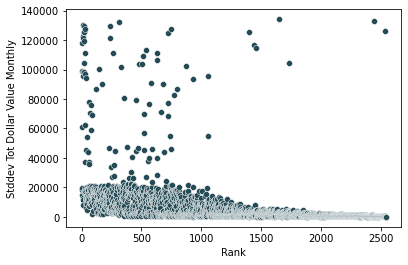

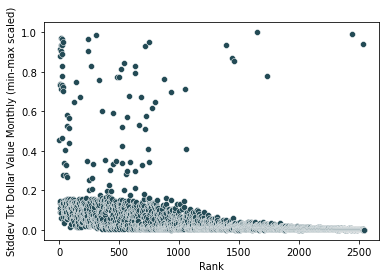

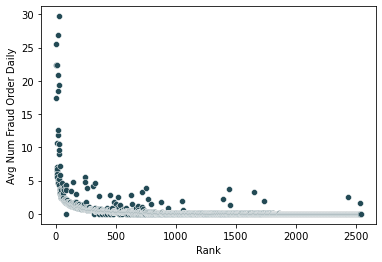

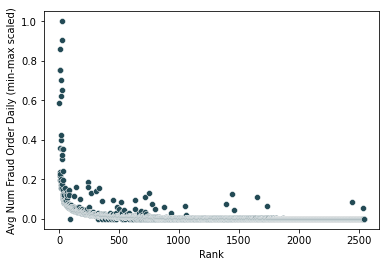

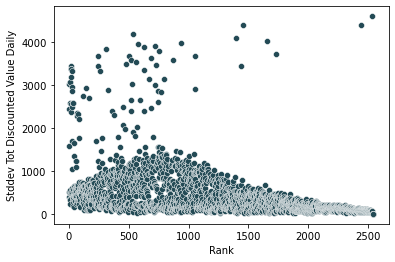

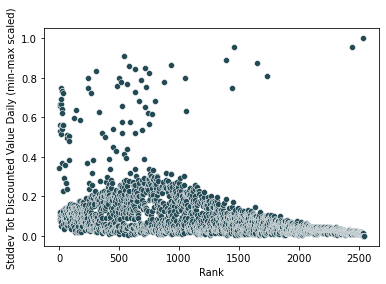

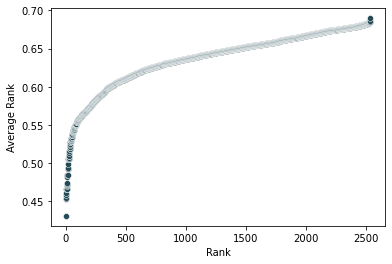

In [11]:
for colname in rank_df.columns:
    if colname[:6] == 'minmax': continue
    if colname in ['merchant_abn', 'name', 'tags', 'tag', 'average_rank']: continue

    plot_metric_vs_rank(rank_df, colname)
    plot_metric_vs_rank(rank_df, colname, minmax = True)

plot_metric_vs_rank(rank_df, 'average_rank')